## Project Goal
- 질병데이터(공공), 유동인구데이터(SK텔레콤), 카드매출데이터(신한카드), SNS데이터(와이즈넛), 유통데이터(GS리테일), 물류데이터(CJ올리브네트웍스) 등 다양한 데이터를 활용하여 감염병(코로나19, 메르스 등)으로 인한 소비/경제/행동 변화에 따른 사회적 영향 분석 및 예측 모델링을 통한 서비스 아이디어와 PoC(Proof Of Concept) 결과 제시

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
resident=pd.read_csv('../CARD_SPENDING_DATA/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt',delimiter='\t',encoding='euc-kr')
foreigner=pd.read_csv('../CARD_SPENDING_DATA/CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt',delimiter='\t',encoding='euc-kr')

In [4]:
resident.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [5]:
resident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   STD_DD      int64 
 1   GU_CD       int64 
 2   DONG_CD     int64 
 3   MCT_CAT_CD  int64 
 4   SEX_CD      object
 5   AGE_CD      int64 
 6   USE_CNT     int64 
 7   USE_AMT     int64 
dtypes: int64(7), object(1)
memory usage: 154.9+ MB


### Data Describtion
- STD_DD	기준일자
- GU_CD	구코드
- DONG_CD	행정동코드
- MCT_CAT_CD	업종코드
- SEX_CD	성별코드
- AGE_CD	나이코드
- USE_CNT	이용건수
- USE_AMT	이용금액

In [6]:
foreigner.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0


In [7]:
print('resident:' , resident.shape ,"foreigner:" , foreigner.shape)

resident: (2537753, 8) foreigner: (238829, 7)


In [8]:
resident.isnull().sum()

STD_DD        0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
SEX_CD        0
AGE_CD        0
USE_CNT       0
USE_AMT       0
dtype: int64

In [9]:
foreigner.isnull().sum()

STD_DD        0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
COUNTRY_NM    0
USE_CNT       0
USE_AMT       3
dtype: int64

In [10]:
resident['YEAR']=resident['STD_DD']//10000
resident['MONTH']=(resident['STD_DD']//100)%100
resident=resident.drop(['STD_DD'],axis=1)

foreigner['YEAR']=foreigner['STD_DD']//10000
foreigner['MONTH']=(foreigner['STD_DD']//100)%100

In [11]:
resident.head()

,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,YEAR,MONTH
0,110,517,10,F,25,11,595,2019,2
1,110,517,10,F,50,5,243,2019,2
2,110,517,10,F,55,5,27,2019,2
3,110,517,10,M,20,11,243,2019,2
4,110,517,10,M,25,11,433,2019,2


In [12]:
print("resident year: ", resident['YEAR'].unique(),"resident month: ",resident['MONTH'].unique())
print("foreigner year: ", foreigner['YEAR'].unique(),"foreigner month: ",foreigner['MONTH'].unique())

resident year:  [2019 2020] resident month:  [2 3 4 5]
foreigner year:  [2019 2020] foreigner month:  [2 4 3 5]


In [13]:
resident = resident[['YEAR','MONTH','GU_CD','DONG_CD','MCT_CAT_CD','SEX_CD','AGE_CD','USE_CNT','USE_AMT']]

In [14]:
# resident.columns=['년','월','구코드','행정동코드','업종코드','성별코드','나이코드','이용건수','이용금액']

In [15]:
resident.head()

,YEAR,MONTH,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019,2,110,517,10,F,25,11,595
1,2019,2,110,517,10,F,50,5,243
2,2019,2,110,517,10,F,55,5,27
3,2019,2,110,517,10,M,20,11,243
4,2019,2,110,517,10,M,25,11,433


In [16]:
print("구코드 unique\n",resident.GU_CD.unique())
print("행정동코드 unique \n",resident.DONG_CD.unique())
print("나이코드 unique\n",resident.AGE_CD.unique())
print("업종코드 unique\n",resident.MCT_CAT_CD.unique())
print("이용건수 unique\n",resident.USE_CNT.unique())
print("이용금액 unique\n",resident.USE_AMT.unique())

구코드 unique
 [110 140 260 350]
행정동코드 unique 
 [517 545 565 575 585 595 640 650 660 670 680 690 520 540 550 570 580 590
 605 615 625 635 645 665 510 530 560 561 601 602 610 620 630 651 652 661
 662 600 611 612 619 621 624 695 700 710 720]
나이코드 unique
 [25 50 55 20 30 35 40 45 65 60]
업종코드 unique
 [10 20 21 31 32 33 34 40 52 62 70 71 80 81 92 22 30 35 42 44 50 43 60]
이용건수 unique
 [  11    5   16 ... 9383 7291 3829]
이용금액 unique
 [  595   243    27 ... 79763 37522 56055]


In [17]:
# 나이별 이용 금액
for i in range(20,70,5):
    print("연령대별 이용 총 금액: ",i ," , ",resident[resident['AGE_CD']==i].USE_AMT.sum())

연령대별 이용 총 금액:  20  ,  345604059
연령대별 이용 총 금액:  25  ,  746116992
연령대별 이용 총 금액:  30  ,  726108683
연령대별 이용 총 금액:  35  ,  790366967
연령대별 이용 총 금액:  40  ,  756676736
연령대별 이용 총 금액:  45  ,  882011212
연령대별 이용 총 금액:  50  ,  793963553
연령대별 이용 총 금액:  55  ,  596300453
연령대별 이용 총 금액:  60  ,  430390045
연령대별 이용 총 금액:  65  ,  495977349


#### 정규분포 곡선을 따름

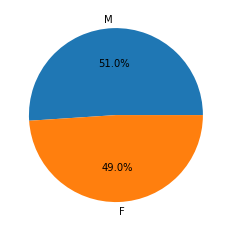

In [18]:
resident.SEX_CD.value_counts()
plt.figure()
categories = ['M','F']
plt.pie(resident.SEX_CD.value_counts(),labels=categories,autopct='%0.1f%%')
plt.show()

In [19]:
resident.GU_CD.value_counts()

350    761412
260    746820
140    667106
110    362415
Name: GU_CD, dtype: int64

*  110 - 대구 중구
*  140 - 서울 중구
*  260 - 대구 수성구
*  350 - 서울 노원구

## Data Visualization

### 연도별 비교 (2019, 2020 총 이용금액 그래프 비교)
- 연도별 카드 총 소비 금액을 비교 :  작년 같은 시기와 비교하여 어떠한 차이점이 나타나는가?
- categories: YEAR, USE_AMT

### 연도별 소비패턴 변화 그래프 분석 
- 연도별 업종에 따른 소비 건수 분석: 사람들이 소비를 어디에 사용했는지를 분석하고 코로나 등 시대 흐름에 따른 패턴 변화를 분석
- categories: YEAR, MAT_CNT..., USE_CNT

In [ ]:
total_mct_usecnt=resident.groupby(['MCT_CAT_CD']).agg({'USE_CNT':['sum']})
total_sex_mct=resident.groupby(['SEX_CD']).agg({'MCT_CAT_CD':['sum']})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_mct_usecnt.plot(ax=ax1)
ax1.set_title("card_usage of mct_cnt_cd", size=13)
ax1.set_ylabel("total useage", size=13)
ax1.set_xlabel("mct_cat_cd", size=13)

total_sex_mct.plot(ax=ax2, color='orange')
ax2.set_title("mct_cat_cd of sex_cd", size=13)
ax2.set_ylabel("total mct_cat_cd", size=13)
ax2.set_xlabel("sex_cd", size=13)

### 지역별 소비 건수와 소비 패턴 분석
- 지역마다 소비패턴의 유사도를 파악 : 왜 이러한 현상이 나타나게 되었는지를 파악 및 분석 진행
> 서울의 카드 소비가 더 많다., 남여 사용 비용은 이용금액에 큰 영향이 없다. 2019년이 2020년보다 더 소비가 많다.(3,4,5월에 편협적이다)

### 시간에 따른 소비패턴과 성별의 연관성
- 각 연도에 따른 소비패턴과 성별과 연관성이 존재하는가?
- 존재한다면 어떠한 상관관계를 가지고 있는가?

### 결론 : 다양한 데이터를 활용하여 감염병(코로나19, 메르스 등)으로 인한 소비/경제/행동 변화에 따른 사회적 영향 파악 및 분석

## Data Featureing

In [ ]:
resident.MCT_CAT_CD.plot(kind='hist',bins=92)

In [ ]:
resident.describe()

### Data M